In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import statistics as st
from numpy.linalg import norm

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import make_scorer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

In [2]:
def cosine_sim(v1, v2):
    v1 = int(v1)
    v2 = int(v2)
    if v1 == 0 and v2 == 0:
        return 1.0
    elif v1 == 0 or v2 == 0:
        return 0.0
    
    va1, va2 = [int(c) for c in str(v1)], [int(c) for c in str(v2)]
    while len(va1) < 4:
        va1.insert(0, 0)
    while len(va2) < 4:
        va2.insert(0, 0)
    
    A = np.array(va1)
    B = np.array(va2)
    
    return round(np.dot(A,B)/(norm(A)*norm(B)), 4)


def cosine_arrs(arr1, arr2):
    A = np.array(arr1)
    B = np.array(arr2)
    
    return round(np.dot(A,B)/(norm(A)*norm(B)), 4)


def inter(a):
    return int(a)


def digit_by_digit_subtraction(num1, num2):
    num1, num2 = abs(num1), abs(num2)
    # Convert the numbers to strings
    num1_str = str(num1)
    num2_str = str(num2)
    
    # Make sure both numbers have the same length
    max_len = max(len(num1_str), len(num2_str))
    num1_str = num1_str.zfill(max_len)
    num2_str = num2_str.zfill(max_len)
    
    result_str = ""
    
    for i in range(max_len):
        digit1 = int(num1_str[i])
        digit2 = int(num2_str[i])
        
        result_digit = digit1 - digit2
        
        result_str += str(result_digit)
    
    result = int("".join(result_str.split("-")))
    return result


def remove_zeros(a):
    a = abs(a)
    return sum([int(c) for c in str(a)])


def find_by_idx(dic, idx):
    counter = 0
    for i in list(dic.keys()):
        if counter <= idx:
            res = [i, dic[i]]
            counter += 1
        else:
            break
    return res


def sumless(a):
    res = 0
    while a > 0:
        res += a
        a -= 1
    return res


def count_nonzero_digits(num):
    num_str = str(num)
    count = sum(1 for digit in num_str if digit != '0')
    return count


def indices_of_nonzero_digits(num):
    num_str = str(num).zfill(4)  # Ensure at least 4 digits with leading zeros
    indices = [index for index, digit in enumerate(num_str) if digit != '0']
    return indices


def indices_of_nonzero_digits_x(num):
    num_str = str(num).zfill(4)  # Ensure at least 4 digits with leading zeros
    indices = []
    for index, digit in enumerate(num_str):
        if digit != '0':
            indices.extend([index] * int(digit))
    return indices


def cosine_distance_list(list1, list2):
    A = np.array(list1)
    B = np.array(list2)
    return 1.0 - (np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B)))


def compare_and_replace_numeric(list_of_strings):
    for i in range(24):
        # Get the set of characters at position i in all strings
        char_set = set(s[i] for s in list_of_strings)

        # If there is more than one unique character, replace with 'x'
        if len(char_set) > 1:
            for j in range(len(list_of_strings)):
                list_of_strings[j] = list_of_strings[j][:i] + 'x' + list_of_strings[j][i + 1:]
    return list_of_strings[0]


def add_zeros(a):
    temp = [c for c in str(a)]
    while len(temp) < 4:
        temp.insert(0, '0')
    return "".join(temp)


def compare_and_replace_with_options(input_list):
    result_list = []  # Create an empty list to store the modified strings
    
    for i in range(24):  # Assuming the length is always 24
        char_set = set(s[i] for s in input_list)
        if len(char_set) > 1:
            options = f"[{''.join(sorted(set(char_set)))}]"
            result_list.append(options)
        else:
            result_list.append(str(list(char_set)[0]))
    
    return "".join(result_list)


def compare_and_replace_with_options_freq(input_list):
    result_list = []  # Create an empty list to store the modified strings
    
    for i in range(24):  # Assuming the length is always 24
        char_set = [s[i] for s in input_list]
        if len(set(char_set)) > 1:
            options = f"[{''.join(sorted(char_set))}]"
            result_list.append(options)
        else:
            result_list.append(str(char_set[0]))
    
    return "".join(result_list)


def get_max(input_list):
    result_list = []  # Create an empty list to store the modified strings
#     res = []
    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
#         char_set = temp
#         temp.append([int(s[i]) for s in input_list])
        if len(set(temp)) <= 1:
            continue
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
#         res.append(char_set)
        rng = max(char_set) - min(char_set)
        if rng > 1:
            rng = 1
        div = len(set(char_set))
#         if len(set(char_set)) > 1:
        result_list.append(div*st.variance(char_set)*rng)
#             result_list.append(len(set(char_set))*st.variance(char_set)/len(char_set))
    
    return result_list
#     return res


def seperator(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        temp.append(c)
        if c == '[':
            b_flag = True
        elif c == ']':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)


def seperator_p(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        temp.append(c)
        if c == '(':
            b_flag = True
        elif c == ')':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)


def weight_cal(in_list):
    res = 0
    for i in in_list:
        if i == 0 or i == 1:
            res += -1
        elif i == 3 or i == 4:
            res += 1
    return ((res/len(in_list)) + 1)/2


def compare_and_replace_with_options_weight(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):  # Assuming the length is always 24
#         print('(result, variability)')
        char_set = [int(s[i]) for s in input_list]
        unique = set(char_set)
        if len(unique) > 1:
            var_st = len(unique)*st.variance(char_set)/len(char_set)
            res = weight_cal(char_set)
            if res < 0.3333:
                res_d = 'l'
            elif res < 0.6666:
                res_d = 'm'
            else:
                res_d = 'h'
            if var_st <= 0.04419191919191919:
                var_d = 'vl'
            elif var_st <= 0.08304498269896193:
                var_d = 'l'
            elif var_st <= 0.14814814814814814:
                var_d = 'm'
            elif var_st <= 0.2740472910927456:
                var_d = 'h'
            else:
                var_d = 'vh'
#             options = '('+str(res)+', '+str(var_st)+')'
            options = '('+res_d+', '+var_d+')'
            result_list.append(options)
        else:
            result_list.append(str(char_set[0]))
    
    return "".join(result_list)


def compare_and_replace_with_options_weight_new(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):  # Assuming the length is always 24
#         print('(result, variability)')
        char_set = [int(s[i]) for s in input_list]
        unique = set(char_set)
        if len(unique) > 1:
            var_st = len(unique)*st.variance(char_set)/len(char_set)
            res = weight_cal(char_set)
            if res < 0.3333:
                res_d = 'l'
            elif res < 0.6666:
                res_d = 'm'
            else:
                res_d = 'h'
            if var_st <= 0.04314403133994396:
                var_d = 'vl'
            elif var_st <= 0.07855954746625828:
                var_d = 'l'
            elif var_st <= 0.125:
                var_d = 'm'
            elif var_st <= 0.2222222222222222:
                var_d = 'h'
            else:
                var_d = 'vh'
#             options = '('+str(res)+', '+str(var_st)+')'
            options = '('+res_d+', '+var_d+')'
            result_list.append(options)
        else:
            result_list.append(str(char_set[0]))
    
    return "".join(result_list)


def get_max(input_list):
    result_list = []  # Create an empty list to store the modified strings
#     res = []
    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
#         char_set = temp
#         temp.append([int(s[i]) for s in input_list])
        if len(set(temp)) <= 1:
            continue
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
#         res.append(char_set)
        rng = max(char_set) - min(char_set)
        if rng > 1:
            rng = 1
        div = len(set(char_set))
#         if len(set(char_set)) > 1:
        result_list.append(div*st.variance(char_set)*rng)
#             result_list.append(len(set(char_set))*st.variance(char_set)/len(char_set))
    
    return result_list
#     return res

In [153]:
from collections import Counter

def count_most_and_least_frequent_items(lst):
    if not lst:
        return 0, 0  # Handle empty list

    counter = Counter(lst)
    most_frequent_count = max(counter.values())
    least_frequent_count = min(counter.values())

    return most_frequent_count, least_frequent_count

# Example usage:
my_list = [1, 1, 1, 2, 2, 3, 3, 3]
most_frequent_count, least_frequent_count = count_most_and_least_frequent_items(my_list)

print(f"Count of most frequent item: {most_frequent_count}")
print(f"Count of least frequent item: {least_frequent_count}")

Count of most frequent item: 3
Count of least frequent item: 2


In [86]:
clusters[0]

['111204404440211240020000', '000004404440211240023002']

In [143]:
st.variance([1, 2, 3])

1

In [21]:
get_max(['3333-3333-3333-3333-3333-3330', '3333-3333-3333-3333-3333-3332', '3333-3333-3333-3333-3333-3333'])
'3333-3333-3333-3333-3333-333[023]'
0, 3
0, 2, 3

[4]

'00023'
2/5 * 2/5 = 4/25
'00033'
2/5 * 1/5 = 2/25
'000333'
1/2 * 1/6 = 1/12 = 2/24
'0000022223333'
8/13 * 2/13 = 16/169

In [3]:
df = pd.read_csv('Zvectors_final.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,5,4,3,2,1,inducing
0,1333,2113,1221,2333,2,4444
1,1333,1221,1223,444,1221,4002
2,3002,1333,2112,1221,2113,3002
3,3112,3002,3112,3003,3112,3112
4,4002,1333,3112,1221,2223,3112
...,...,...,...,...,...,...
4199,2222,2222,3222,1332,4222,3222
4200,4442,442,4110,3443,444,4442
4201,2331,1333,4331,3221,3000,1001
4202,2331,1333,4331,3221,3000,1111


In [4]:
states = []
for i in tqdm(range(len(df))):
    temp = df.iloc[i]
    res1 = []
    fi = [c for c in str(temp['5'])]
    while len(fi) < 4:
        fi.insert(0, '0')
    fo = [c for c in str(temp['4'])]
    while len(fo) < 4:
        fo.insert(0, '0')
    th = [c for c in str(temp['3'])]
    while len(th) < 4:
        th.insert(0, '0')
    tw = [c for c in str(temp['2'])]
    while len(tw) < 4:
        tw.insert(0, '0')
    on = [c for c in str(temp['1'])]
    while len(on) < 4:
        on.insert(0, '0')
    nd = [c for c in str(temp['inducing'])]
    while len(nd) < 4:
        nd.insert(0, '0')
    res1.extend(fi)
    res1.extend(fo)
    res1.extend(th)
    res1.extend(tw)
    res1.extend(on)
    res1.extend(nd)
    states.append(list(map(inter, res1)))

100%|██████████| 4204/4204 [00:01<00:00, 4199.64it/s]


In [5]:
# Convert the list of lists to a NumPy array
state_array = np.array(states)

# Calculate the pairwise distances based on the cosine similarity function
distances = pdist(state_array, cosine_distance_list)

In [6]:
threshold = 0.155750625

In [7]:
state_names = list(range(1, 4205))

# Initialize lists to store captured text and image outputs
captured_outputs = []

# Initialize a dictionary to map cluster numbers to lists of states
cluster_to_states = {}

method = 'average'

ress = []

# for method in [, 'complete', 'average', 'ward']:  # Try different linkage methods
linkage_matrix = linkage(distances, method=method)

cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
num_clusters = len(set(cluster_labels))

# Capture the text output
captured_output = f"Threshold: {threshold}, Number of clusters: {num_clusters}\n"

# Initialize a dictionary to map cluster numbers to lists of states
cluster_states = {cluster_num: [] for cluster_num in range(1, num_clusters + 1)}

for i, cluster_num in enumerate(cluster_labels):
    cluster_states[cluster_num].append(state_names[i])

max_cluster_size = 0
max_cluster_num = 0

for cluster_num, states in cluster_states.items():
    if len(states) > max_cluster_size:
        max_cluster_size = len(states)
        max_cluster_num = cluster_num

captured_output += f"Cluster with max elements: {max_cluster_size}, Cluster Sizes:\n"

for cluster_num, states in cluster_states.items():
    captured_output += f"Cluster {cluster_num} has {len(states)} elements: {states}\n"
    ress.append(states)

# Append the captured output to the list
captured_outputs.append(captured_output)

# Print a separator
captured_outputs.append("*****************************************************************************")

# Print the captured outputs for the current method
for output in captured_outputs:
    print(output)

# Save the captured text outputs to a text file
# with open("h_cluster/output_average_final.txt", "w") as f:
#     f.writelines(captured_outputs)

Threshold: 0.155750625, Number of clusters: 324
Cluster with max elements: 121, Cluster Sizes:
Cluster 1 has 2 elements: [242, 360]
Cluster 2 has 1 elements: [256]
Cluster 3 has 1 elements: [3901]
Cluster 4 has 1 elements: [1968]
Cluster 5 has 10 elements: [1186, 1187, 1189, 1190, 1216, 3618, 3619, 3621, 3632, 4086]
Cluster 6 has 9 elements: [1526, 1527, 1534, 1559, 3898, 3899, 3955, 3956, 3957]
Cluster 7 has 6 elements: [1529, 1532, 1663, 4151, 4152, 4153]
Cluster 8 has 3 elements: [258, 1052, 3484]
Cluster 9 has 2 elements: [232, 1998]
Cluster 10 has 2 elements: [3069, 3070]
Cluster 11 has 2 elements: [492, 2584]
Cluster 12 has 8 elements: [20, 509, 1510, 2416, 2417, 2627, 3551, 3885]
Cluster 13 has 2 elements: [433, 2473]
Cluster 14 has 6 elements: [491, 493, 1178, 2582, 2583, 2585]
Cluster 15 has 3 elements: [1084, 3510, 4083]
Cluster 16 has 8 elements: [153, 1642, 4104, 4105, 4106, 4112, 4113, 4114]
Cluster 17 has 1 elements: [23]
Cluster 18 has 4 elements: [464, 465, 2537, 2538]


In [8]:
clusters = []
for ls in ress:
    temp = []
    for i in ls:
        temp.append("".join(list(map(add_zeros, list(df.iloc[i-1])))))
    clusters.append(temp)
clusters

[['111204404440211240020000', '000004404440211240023002'],
 ['000014434440400202210442'],
 ['111011104331200100000220'],
 ['100021104220211021100004'],
 ['110200024002000110012002',
  '100202224002000110022002',
  '200200033002000110022112',
  '110200024002000200022002',
  '100202233112000100012002',
  '110200024003000110012001',
  '100202224003000110022001',
  '200200023112000110022112',
  '100212223112000100012002',
  '100302233113200320013003'],
 ['100200024332100211120112',
  '100210023222100200020112',
  '100200022112200210020112',
  '100200023222100200020112',
  '100200024332100212220122',
  '100200024332100211120122',
  '111100014221100300010111',
  '111100014221100400010111',
  '100200024222100310020112'],
 ['100200023002100220020112',
  '100200023002000231120112',
  '100211123112100210020002',
  '100410024112000210020002',
  '100410124112000210020002',
  '100410014112000200020002'],
 ['400021120221011240040000',
  '400201120212022330020002',
  '400201110222022230020002'],
 ['1

In [10]:
xs1 = []
xs = []
for cl in clusters:
    if len(cl) < 2:
        xs1.append(cl[0])
        continue
    temp = compare_and_replace_numeric(cl)
    xs.append(temp)
    xs1.append(temp)

In [15]:
xs

['xxxx0440444021124002x00x',
 'xx0xxxxxxxxxx00xx00xxxxx',
 '1xxxx00xxxxxx00xxxxx01xx',
 '100xxxxxxxx2x002xxx20xx2',
 '400xx11x02xx0xxxx00x000x',
 'xxx4044x0004x000xxx3x441',
 '3001x44x3001300130014440',
 '011244x1000xx00321121330',
 'xxxxxxxxxxxxxxxxxxxxxxxx',
 'x11x03300440x00x300x0333',
 'xxx24xxxxxxxxxxxxxxxxxx0',
 '0xxxxxx1200x20xx4xxxx00x',
 'xxxxxxxxxxxxxxxxxxxxx00x',
 'xxxxxxxx0003xxxx0xxx4004',
 '000x0x22x0024112022x4002',
 '0002x00x100xxxxx0332200x',
 '000xx00xxxxxxxxxx0022002',
 '000xx00xx2xxxxxxxxx22002',
 '011x11140xxx4xxxxxx4x00x',
 'xxxx000xxxxxxxxxxxxxxxxx',
 'xxxxx00xxxxxxxxxxxxxxxxx',
 '000x00032xxx0xxx42x1x332',
 'x00xx002x44xx002xxx2xxxx',
 'xxxxxxxxx444044x0000xxx2',
 'xxxxx00xx33xxxxxxxxxxxxx',
 'xxxxxxxxxxxxxxxxxxxxxxxx',
 'xxxxxxxxxxxxxxxxxxxxxxxx',
 'x00xxxxxx44xxxxxxxxxxxxx',
 '000xxxxxx00xxxxxx00x444x',
 'xxxxxxxxxxxxxxxxxxxxxxxx',
 'xxxxxxxxxxxxx00xxxxx4xxx',
 '0002111xxxxx03x4300x444x',
 'xxxxxxxxxxxxxxxxx00xxxxx',
 '0xxxxxxxxxxxxxxxxxxx444x',
 '00040xxxxxxx

In [16]:
xs1

['xxxx0440444021124002x00x',
 '000014434440400202210442',
 '111011104331200100000220',
 '100021104220211021100004',
 'xx0xxxxxxxxxx00xx00xxxxx',
 '1xxxx00xxxxxx00xxxxx01xx',
 '100xxxxxxxx2x002xxx20xx2',
 '400xx11x02xx0xxxx00x000x',
 'xxx4044x0004x000xxx3x441',
 '3001x44x3001300130014440',
 '011244x1000xx00321121330',
 'xxxxxxxxxxxxxxxxxxxxxxxx',
 'x11x03300440x00x300x0333',
 'xxx24xxxxxxxxxxxxxxxxxx0',
 '0xxxxxx1200x20xx4xxxx00x',
 'xxxxxxxxxxxxxxxxxxxxx00x',
 '044120024221000141130112',
 'xxxxxxxx0003xxxx0xxx4004',
 '000x0x22x0024112022x4002',
 '0002x00x100xxxxx0332200x',
 '000xx00xxxxxxxxxx0022002',
 '000xx00xx2xxxxxxxxx22002',
 '011x11140xxx4xxxxxx4x00x',
 'xxxx000xxxxxxxxxxxxxxxxx',
 'xxxxx00xxxxxxxxxxxxxxxxx',
 '000x00032xxx0xxx42x1x332',
 'x00xx002x44xx002xxx2xxxx',
 'xxxxxxxxx444044x0000xxx2',
 'xxxxx00xx33xxxxxxxxxxxxx',
 'xxxxxxxxxxxxxxxxxxxxxxxx',
 '400240040222044040040334',
 'xxxxxxxxxxxxxxxxxxxxxxxx',
 'x00xxxxxx44xxxxxxxxxxxxx',
 '000xxxxxx00xxxxxx00x444x',
 'xxxxxxxxxxxx

In [9]:
os = []
for cl in clusters:
    if len(cl) < 2:
        continue
    compare_and_replace_with_options(cl)
    os.append(compare_and_replace_with_options(cl))

In [10]:
os

['[01][01][01][02]0440444021124002[03]00[02]',
 '[12][01]0[23][01][02][02][23][34][01][01][23][02]00[123][012]00[12][23][01][01][123]',
 '1[01][01][12][01]00[12][234][123][123][12][12]00[234][01][012][012][12]01[12][12]',
 '100[24][01][01][01][12][34][01][01]2[01]002[0123][01][01]20[01][01]2',
 '400[02][02]11[12]02[12][12]0[12][12][23][34]00[24]000[02]',
 '[14][01][01]4044[01]0004[01]000[13][02][02]3[02]441',
 '3001[12]44[01]3001300130014440',
 '011244[34]1000[01][01]00321121330',
 '[23][01][01][23][134][24][234][012][123][012][01][23][234][01][01][234][123][01][01][1234][01][234][234][01]',
 '[23]11[12]03300440[12]00[12]300[12]0333',
 '[012][01][01]24[34][34][0134][012][34][34][02][01][01][01][012][024][01][01][23][01][234][234]0',
 '0[23][23][01][13][01][01]1200[12]20[01][02]4[34][34][34][13]00[12]',
 '[234][234][234][012][124][01][01][0123][1234][01][01][123][01][012][012][0123][34][34][34][01234][012]00[012]',
 '[12][12][12][12][012][12][12][12]0003[01][01][01][234]0[01][01][24]400

In [11]:
road = []
for ls in os:
    road.append(seperator(ls))
road

['[01][01][01][02]-0440-4440-2112-4002-[03]00[02]',
 '[12][01]0[23]-[01][02][02][23]-[34][01][01][23]-[02]00[123]-[012]00[12]-[23][01][01][123]',
 '1[01][01][12]-[01]00[12]-[234][123][123][12]-[12]00[234]-[01][012][012][12]-01[12][12]',
 '100[24]-[01][01][01][12]-[34][01][01]2-[01]002-[0123][01][01]2-0[01][01]2',
 '400[02]-[02]11[12]-02[12][12]-0[12][12][23]-[34]00[24]-000[02]',
 '[14][01][01]4-044[01]-0004-[01]000-[13][02][02]3-[02]441',
 '3001-[12]44[01]-3001-3001-3001-4440',
 '0112-44[34]1-000[01]-[01]003-2112-1330',
 '[23][01][01][23]-[134][24][234][012]-[123][012][01][23]-[234][01][01][234]-[123][01][01][1234]-[01][234][234][01]',
 '[23]11[12]-0330-0440-[12]00[12]-300[12]-0333',
 '[012][01][01]2-4[34][34][0134]-[012][34][34][02]-[01][01][01][012]-[024][01][01][23]-[01][234][234]0',
 '0[23][23][01]-[13][01][01]1-200[12]-20[01][02]-4[34][34][34]-[13]00[12]',
 '[234][234][234][012]-[124][01][01][0123]-[1234][01][01][123]-[01][012][012][0123]-[34][34][34][01234]-[012]00[012]',
 '[12][

In [12]:
osf = []
for cl in clusters:
    if len(cl) < 2:
        continue
    compare_and_replace_with_options(cl)
    osf.append(compare_and_replace_with_options_freq(cl))

In [13]:
osf

['[01][01][01][02]0440444021124002[03]00[02]',
 '[1111111122][0000000111]0[2222222223][0000000001][0000022222][0000022222][2222222333][3333344444][0000001111][0000001111][2222222333][0000000002]00[1111111123][0001111112]00[1111122222][2222222223][0000000011][0000000011][1122222223]',
 '1[000000011][000000011][112222222][000000001]00[112222222][233444444][122222333][122222333][112222222][111111112]00[222222334][000011111][000000112][000000112][112222222]01[111111122][112222222]',
 '100[222444][001111][000001][000011][122222][333444][001111][001111]2[000011]002[011123][000001][000001]20[000011][000011]2',
 '400[022][002]11[122]02[122][122]0[122][122][223][334]00[224]000[022]',
 '[14][01][01]4044[01]0004[01]000[13][02][02]3[02]441',
 '3001[12]44[01]3001300130014440',
 '011244[34]1000[01][01]00321121330',
 '[22222233][00000111][00000001][22222333][11133444][24444444][23444444][01111122][11111223][00011122][00011111][22233333][22334444][00000001][00000001][22222344][11122233][00001111][0000

In [14]:
road_f = []
for ls in osf:
    road_f.append(seperator(ls))
road_f

['[01][01][01][02]-0440-4440-2112-4002-[03]00[02]',
 '[1111111122][0000000111]0[2222222223]-[0000000001][0000022222][0000022222][2222222333]-[3333344444][0000001111][0000001111][2222222333]-[0000000002]00[1111111123]-[0001111112]00[1111122222]-[2222222223][0000000011][0000000011][1122222223]',
 '1[000000011][000000011][112222222]-[000000001]00[112222222]-[233444444][122222333][122222333][112222222]-[111111112]00[222222334]-[000011111][000000112][000000112][112222222]-01[111111122][112222222]',
 '100[222444]-[001111][000001][000011][122222]-[333444][001111][001111]2-[000011]002-[011123][000001][000001]2-0[000011][000011]2',
 '400[022]-[002]11[122]-02[122][122]-0[122][122][223]-[334]00[224]-000[022]',
 '[14][01][01]4-044[01]-0004-[01]000-[13][02][02]3-[02]441',
 '3001-[12]44[01]-3001-3001-3001-4440',
 '0112-44[34]1-000[01]-[01]003-2112-1330',
 '[22222233][00000111][00000001][22222333]-[11133444][24444444][23444444][01111122]-[11111223][00011122][00011111][22233333]-[22334444][00000001][0

In [15]:
a = {len(k): i for i, k in enumerate(road_f)}
a

{47: 281,
 238: 1,
 199: 64,
 127: 3,
 73: 4,
 56: 198,
 35: 164,
 38: 271,
 245: 8,
 44: 268,
 176: 30,
 85: 108,
 227: 144,
 104: 13,
 41: 269,
 61: 15,
 101: 75,
 120: 17,
 89: 123,
 218: 76,
 293: 290,
 65: 295,
 107: 22,
 146: 284,
 209: 286,
 197: 294,
 141: 28,
 461: 90,
 53: 279,
 183: 121,
 609: 33,
 155: 300,
 953: 35,
 50: 282,
 134: 153,
 328: 38,
 229: 197,
 315: 298,
 97: 285,
 119: 46,
 437: 48,
 71: 139,
 689: 49,
 869: 217,
 157: 53,
 341: 202,
 205: 253,
 581: 219,
 173: 287,
 79: 159,
 149: 142,
 485: 181,
 337: 69,
 645: 71,
 74: 165,
 162: 169,
 109: 248,
 114: 78,
 189: 155,
 653: 245,
 413: 239,
 1157: 86,
 965: 247,
 309: 126,
 62: 119,
 667: 93,
 249: 209,
 259: 263,
 99: 259,
 1037: 105,
 81: 275,
 605: 107,
 509: 186,
 917: 111,
 489: 112,
 323: 289,
 1085: 237,
 213: 120,
 677: 241,
 305: 299,
 69: 255,
 133: 128,
 200: 130,
 165: 141,
 409: 132,
 282: 274,
 1373: 134,
 449: 136,
 2957: 138,
 105: 143,
 113: 261,
 989: 147,
 269: 218,
 821: 222,
 351: 151,
 

In [16]:
max(list(a.keys()))

2957

In [17]:
a[2957]

138

In [18]:
road_f[138]

'[0111111111111111111111111222222222222222222222222222222222222222222222222222222222233333333333333333333333333333333334444][0000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111122][0000000000000000000000000000000000000000000000000000000000000000000000000001111111111111111111111111111111111111111111111][0111111222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222233333]-[1111111111111111111112222222222222222222222222222222222222222223333333333333333333333333333333333333333333333333444444444][0000000000000000000000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111122222][0000000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111122222][1111112222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222233]-[000111111111

In [19]:
s = 0
for i in road_f[138].split("-")[0].split(']')[0]:
    if i != '[':
        s += int(i)
        
s/121

2.1322314049586777

In [64]:
clusters[0]

['111204404440211240020000', '000004404440211240023002']

In [61]:
var_st = []
for cl in clusters:
    if len(cl) < 2:
        continue
    var_st.append(get_max(cl))
var_st

[[0.5, 2.0, 0.5],
 [0.035555555555555556,
  0.02,
  0.05555555555555556,
  0.05555555555555556,
  0.04666666666666667,
  0.04666666666666667,
  0.02,
  0.13666666666666666,
  0.02,
  0.05555555555555556,
  0.02,
  0.09666666666666668],
 [0.043209876543209874,
  0.043209876543209874,
  0.02469135802469136,
  0.14814814814814814,
  0.14814814814814814,
  0.043209876543209874,
  0.02469135802469136,
  0.05555555555555555,
  0.02469135802469136,
  0.02469135802469136,
  0.043209876543209874,
  0.043209876543209874,
  0.043209876543209874],
 [0.09999999999999999, 0.05555555555555555, 0.3499999999999999],
 [0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222,
  0.2222222222222222],
 [2.0, 2.0, 0.5, 0.5, 0.5],
 [0.5],
 [],
 [0.05357142857142857,
  0.06696428571428571,
  0.26785714285714285,
  0.03125,
  0.03125,
  0.05357142857142857,
  0.2142857142857

In [57]:
vals = []
for i in var_st:
    for j in i:
        vals.append(j)
vals

[0.5,
 0.5,
 0.5,
 4.0,
 13.5,
 4.0,
 0.035555555555555556,
 0.04666666666666666,
 0.02,
 0.02,
 0.4444444444444445,
 0.4444444444444445,
 0.04666666666666667,
 0.05555555555555556,
 0.05333333333333333,
 0.05333333333333333,
 0.04666666666666667,
 0.16,
 0.2733333333333333,
 0.24000000000000005,
 0.05555555555555556,
 0.02,
 0.03555555555555556,
 0.03555555555555556,
 0.19333333333333336,
 0.043209876543209874,
 0.043209876543209874,
 0.043209876543209874,
 0.024691358024691357,
 0.043209876543209874,
 0.35185185185185186,
 0.2962962962962963,
 0.2962962962962963,
 0.043209876543209874,
 0.02469135802469136,
 0.35185185185185186,
 0.0617283950617284,
 0.35185185185185186,
 0.35185185185185186,
 0.043209876543209874,
 0.043209876543209874,
 0.043209876543209874,
 0.7999999999999999,
 0.08888888888888889,
 0.05555555555555556,
 0.0888888888888889,
 0.05555555555555555,
 0.09999999999999999,
 0.08888888888888889,
 0.08888888888888889,
 0.0888888888888889,
 2.1333333333333333,
 0.05555555

In [22]:
road_f

['[01][01][01][02]-0440-4440-2112-4002-[03]00[02]',
 '[1111111122][0000000111]0[2222222223]-[0000000001][0000022222][0000022222][2222222333]-[3333344444][0000001111][0000001111][2222222333]-[0000000002]00[1111111123]-[0001111112]00[1111122222]-[2222222223][0000000011][0000000011][1122222223]',
 '1[000000011][000000011][112222222]-[000000001]00[112222222]-[233444444][122222333][122222333][112222222]-[111111112]00[222222334]-[000011111][000000112][000000112][112222222]-01[111111122][112222222]',
 '100[222444]-[001111][000001][000011][122222]-[333444][001111][001111]2-[000011]002-[011123][000001][000001]2-0[000011][000011]2',
 '400[022]-[002]11[122]-02[122][122]-0[122][122][223]-[334]00[224]-000[022]',
 '[14][01][01]4-044[01]-0004-[01]000-[13][02][02]3-[02]441',
 '3001-[12]44[01]-3001-3001-3001-4440',
 '0112-44[34]1-000[01]-[01]003-2112-1330',
 '[22222233][00000111][00000001][22222333]-[11133444][24444444][23444444][01111122]-[11111223][00011122][00011111][22233333]-[22334444][00000001][0

In [58]:
max(vals)

32.0

In [59]:
min(vals)

0.0006858710562414267

In [25]:
sorted(vals, reverse=True)

[8.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 2.6666666666666665,
 2.6666666666666665,
 2.5200000000000005,
 2.4,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.222222222222222,
 2.222222222222222,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.933333333333333,
 1.92,
 1.92,
 1.8571428571428572,
 1.8571428571428572,
 1.7111111111111112,
 1.7111111111111112,
 1.711111111111111,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6666666666666667,
 1.6666666666666667,
 1.6200000000000003,
 1.605442176870748,
 1.6000000000000003,
 1.5714285714285714,
 1.5714285714285714,
 1.5714285714285714,
 1.511111111111111,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.4910714285714286,
 1.4444444444444444,
 1.4444444444444442,
 1

In [26]:
sorted(vals, reverse=True)

[8.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 2.6666666666666665,
 2.6666666666666665,
 2.5200000000000005,
 2.4,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.222222222222222,
 2.222222222222222,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.933333333333333,
 1.92,
 1.92,
 1.8571428571428572,
 1.8571428571428572,
 1.7111111111111112,
 1.7111111111111112,
 1.711111111111111,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6875,
 1.6666666666666667,
 1.6666666666666667,
 1.6200000000000003,
 1.605442176870748,
 1.6000000000000003,
 1.5714285714285714,
 1.5714285714285714,
 1.5714285714285714,
 1.511111111111111,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.4910714285714286,
 1.4444444444444444,
 1.4444444444444442,
 1

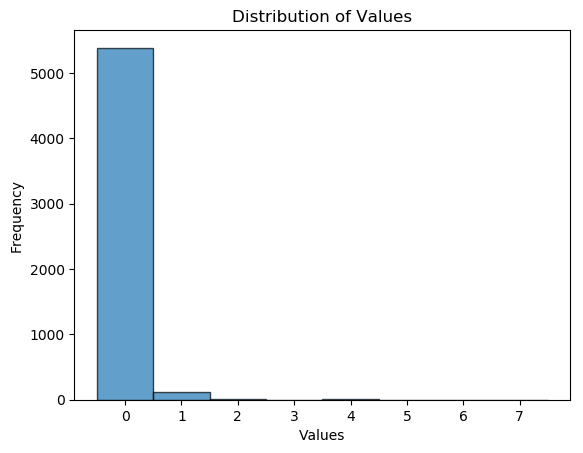

In [27]:
# Plotting the histogram with floating-point bins
plt.hist(vals, bins=np.arange(min(vals), max(vals) + 0.5, 1), align='left', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# Display the plot
plt.show()

In [28]:
def percentile_classification(lst):
    temp = []
    column = lst
    d_value = []
    for i in column:
        if i not in d_value:
            d_value.append(i)
    for i in column:
        if i < np.nanpercentile(d_value, 20):
            temp.append(0)
        elif np.nanpercentile(d_value, 20) <= i < np.nanpercentile(d_value, 40):
            temp.append(1)
        elif np.nanpercentile(d_value, 40) <= i < np.nanpercentile(d_value, 60):
            temp.append(2)
        elif np.nanpercentile(d_value, 60) <= i < np.nanpercentile(d_value, 80):
            temp.append(3)
        elif np.nanpercentile(d_value, 80) <= i:
            temp.append(4)
    return temp

In [29]:
pc = percentile_classification(vals)
pc

[4,
 4,
 4,
 4,
 4,
 4,
 0,
 1,
 0,
 0,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 3,
 3,
 3,
 1,
 0,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 4,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 4,
 1,
 1,
 2,
 2,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 0,
 1,
 4,
 3,
 3,
 3,
 3,
 4,
 1,
 1,
 4,
 0,
 0,
 4,
 4,
 2,
 1,
 4,
 1,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 4,
 4,
 2,
 2,
 4,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 3,
 1,
 3,
 3,
 4,
 0,
 0,
 0,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 4,
 2,
 2,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 1,
 4,
 1,
 1,
 1,
 4,
 4,
 4,
 3,
 4,
 1,
 1,
 4,
 1,
 1,


In [30]:
vals

[0.5,
 0.5,
 0.5,
 2.0,
 4.5,
 2.0,
 0.035555555555555556,
 0.04666666666666666,
 0.02,
 0.02,
 0.22222222222222224,
 0.22222222222222224,
 0.04666666666666667,
 0.05555555555555556,
 0.05333333333333333,
 0.05333333333333333,
 0.04666666666666667,
 0.08,
 0.13666666666666666,
 0.12000000000000002,
 0.05555555555555556,
 0.02,
 0.03555555555555556,
 0.03555555555555556,
 0.09666666666666668,
 0.043209876543209874,
 0.043209876543209874,
 0.043209876543209874,
 0.024691358024691357,
 0.043209876543209874,
 0.17592592592592593,
 0.14814814814814814,
 0.14814814814814814,
 0.043209876543209874,
 0.02469135802469136,
 0.17592592592592593,
 0.0617283950617284,
 0.17592592592592593,
 0.17592592592592593,
 0.043209876543209874,
 0.043209876543209874,
 0.043209876543209874,
 0.39999999999999997,
 0.08888888888888889,
 0.05555555555555556,
 0.0888888888888889,
 0.05555555555555555,
 0.09999999999999999,
 0.08888888888888889,
 0.08888888888888889,
 0.0888888888888889,
 0.7111111111111111,
 0.055

In [31]:
a = dict(zip(vals, pc))
a

{0.5: 4,
 2.0: 4,
 4.5: 4,
 0.035555555555555556: 0,
 0.04666666666666666: 1,
 0.02: 0,
 0.22222222222222224: 3,
 0.04666666666666667: 1,
 0.05555555555555556: 1,
 0.05333333333333333: 1,
 0.08: 2,
 0.13666666666666666: 3,
 0.12000000000000002: 2,
 0.03555555555555556: 0,
 0.09666666666666668: 2,
 0.043209876543209874: 1,
 0.024691358024691357: 0,
 0.17592592592592593: 3,
 0.14814814814814814: 3,
 0.02469135802469136: 0,
 0.0617283950617284: 1,
 0.39999999999999997: 4,
 0.08888888888888889: 2,
 0.0888888888888889: 2,
 0.05555555555555555: 1,
 0.09999999999999999: 2,
 0.7111111111111111: 4,
 0.8888888888888888: 4,
 0.888888888888889: 4,
 0.2222222222222222: 3,
 0.05357142857142857: 1,
 0.06696428571428571: 1,
 0.03125: 0,
 0.7433035714285714: 4,
 0.125: 3,
 0.20758928571428573: 3,
 0.15401785714285715: 3,
 0.21428571428571427: 3,
 0.2611607142857143: 4,
 0.29464285714285715: 4,
 0.31473214285714285: 4,
 0.07142857142857142: 2,
 0.41964285714285715: 4,
 0.48333333333333334: 4,
 1.5111111

In [32]:
np.nanpercentile(vals, 20)

0.04419191919191919

In [33]:
np.nanpercentile(vals, 40)

0.08304498269896193

In [34]:
np.nanpercentile(vals, 60)

0.14814814814814814

In [35]:
np.nanpercentile(vals, 80)

0.2740472910927456

In [36]:
np.nanpercentile(vals, 90)

0.5

In [37]:
np.nanpercentile(vals, 100)

8.0

In [38]:
len(vals)

5516

In [39]:
def count_condition(lst, cond, thresh):
    if cond == '<':
        return [i for i in lst if i < thresh]
    elif cond == '>':
        return [i for i in lst if i > thresh]
    elif cond == '<=':
        return [i for i in lst if i <= thresh]
    elif cond == '>=':
        return [i for i in lst if i >= thresh]

In [40]:
len(count_condition(vals, '<', 0.01))

110

In [41]:
res = []
for cl in clusters:
    if len(cl) < 2:
        continue
    res.append(compare_and_replace_with_options_weight(cl))
res

['(l, vh)(l, vh)(l, vh)(l, vh)0440444021124002(m, vh)00(l, vh)',
 '(l, vl)(l, l)0(m, vl)(l, vl)(l, h)(l, h)(m, l)(h, l)(l, l)(l, l)(m, l)(l, l)00(l, m)(l, m)00(l, l)(m, vl)(l, vl)(l, vl)(m, m)',
 '1(l, vl)(l, vl)(m, vl)(l, vl)00(m, vl)(h, h)(m, m)(m, m)(m, vl)(l, vl)00(h, h)(l, l)(l, h)(l, h)(m, vl)01(l, vl)(m, vl)',
 '100(h, vh)(l, m)(l, l)(l, m)(m, l)(h, m)(l, m)(l, m)2(l, m)002(l, vh)(l, l)(l, l)20(l, m)(l, m)2',
 '400(m, vh)(l, vh)11(m, h)02(m, h)(m, h)0(m, h)(m, h)(h, h)(h, h)00(h, vh)000(m, vh)',
 '(m, vh)(l, vh)(l, vh)4044(l, vh)0004(l, vh)000(m, vh)(l, vh)(l, vh)3(l, vh)441',
 '3001(l, vh)44(l, vh)3001300130014440',
 '011244(h, vh)1000(l, vh)(l, vh)00321121330',
 '(m, l)(l, l)(l, vl)(h, l)(m, vh)(h, m)(h, h)(l, h)(l, h)(l, h)(l, l)(h, l)(h, vh)(l, vl)(l, vl)(h, vh)(m, h)(l, l)(l, l)(m, vh)(l, l)(h, vh)(h, vh)(l, l)',
 '(h, vh)11(l, vh)03300440(l, vh)00(l, vh)300(l, vh)0333',
 '(l, vh)(l, l)(l, l)24(h, l)(h, l)(m, vh)(l, vh)(h, m)(h, m)(l, vh)(l, l)(l, l)(l, l)(l, vh)(m, vh)(l, 

In [42]:
res_f = []
for r in res:
    res_f.append(seperator_p(r))
    
res_f

['(l, vh)(l, vh)(l, vh)(l, vh)-0440-4440-2112-4002-(m, vh)00(l, vh)',
 '(l, vl)(l, l)0(m, vl)-(l, vl)(l, h)(l, h)(m, l)-(h, l)(l, l)(l, l)(m, l)-(l, l)00(l, m)-(l, m)00(l, l)-(m, vl)(l, vl)(l, vl)(m, m)',
 '1(l, vl)(l, vl)(m, vl)-(l, vl)00(m, vl)-(h, h)(m, m)(m, m)(m, vl)-(l, vl)00(h, h)-(l, l)(l, h)(l, h)(m, vl)-01(l, vl)(m, vl)',
 '100(h, vh)-(l, m)(l, l)(l, m)(m, l)-(h, m)(l, m)(l, m)2-(l, m)002-(l, vh)(l, l)(l, l)2-0(l, m)(l, m)2',
 '400(m, vh)-(l, vh)11(m, h)-02(m, h)(m, h)-0(m, h)(m, h)(h, h)-(h, h)00(h, vh)-000(m, vh)',
 '(m, vh)(l, vh)(l, vh)4-044(l, vh)-0004-(l, vh)000-(m, vh)(l, vh)(l, vh)3-(l, vh)441',
 '3001-(l, vh)44(l, vh)-3001-3001-3001-4440',
 '0112-44(h, vh)1-000(l, vh)-(l, vh)003-2112-1330',
 '(m, l)(l, l)(l, vl)(h, l)-(m, vh)(h, m)(h, h)(l, h)-(l, h)(l, h)(l, l)(h, l)-(h, vh)(l, vl)(l, vl)(h, vh)-(m, h)(l, l)(l, l)(m, vh)-(l, l)(h, vh)(h, vh)(l, l)',
 '(h, vh)11(l, vh)-0330-0440-(l, vh)00(l, vh)-300(l, vh)-0333',
 '(l, vh)(l, l)(l, l)2-4(h, l)(h, l)(m, vh)-(l, vh)(h,

In [43]:
res = []
for cl in clusters:
    if len(cl) < 2:
        continue
    res.append(compare_and_replace_with_options_weight(cl))
res

['(l, vh)(l, vh)(l, vh)(l, vh)0440444021124002(m, vh)00(l, vh)',
 '(l, vl)(l, l)0(m, vl)(l, vl)(l, h)(l, h)(m, l)(h, l)(l, l)(l, l)(m, l)(l, l)00(l, m)(l, m)00(l, l)(m, vl)(l, vl)(l, vl)(m, m)',
 '1(l, vl)(l, vl)(m, vl)(l, vl)00(m, vl)(h, h)(m, m)(m, m)(m, vl)(l, vl)00(h, h)(l, l)(l, h)(l, h)(m, vl)01(l, vl)(m, vl)',
 '100(h, vh)(l, m)(l, l)(l, m)(m, l)(h, m)(l, m)(l, m)2(l, m)002(l, vh)(l, l)(l, l)20(l, m)(l, m)2',
 '400(m, vh)(l, vh)11(m, h)02(m, h)(m, h)0(m, h)(m, h)(h, h)(h, h)00(h, vh)000(m, vh)',
 '(m, vh)(l, vh)(l, vh)4044(l, vh)0004(l, vh)000(m, vh)(l, vh)(l, vh)3(l, vh)441',
 '3001(l, vh)44(l, vh)3001300130014440',
 '011244(h, vh)1000(l, vh)(l, vh)00321121330',
 '(m, l)(l, l)(l, vl)(h, l)(m, vh)(h, m)(h, h)(l, h)(l, h)(l, h)(l, l)(h, l)(h, vh)(l, vl)(l, vl)(h, vh)(m, h)(l, l)(l, l)(m, vh)(l, l)(h, vh)(h, vh)(l, l)',
 '(h, vh)11(l, vh)03300440(l, vh)00(l, vh)300(l, vh)0333',
 '(l, vh)(l, l)(l, l)24(h, l)(h, l)(m, vh)(l, vh)(h, m)(h, m)(l, vh)(l, l)(l, l)(l, l)(l, vh)(m, vh)(l, 

In [44]:
res_f = []
for r in res:
    res_f.append(seperator_p(r))
    
res_f

['(l, vh)(l, vh)(l, vh)(l, vh)-0440-4440-2112-4002-(m, vh)00(l, vh)',
 '(l, vl)(l, l)0(m, vl)-(l, vl)(l, h)(l, h)(m, l)-(h, l)(l, l)(l, l)(m, l)-(l, l)00(l, m)-(l, m)00(l, l)-(m, vl)(l, vl)(l, vl)(m, m)',
 '1(l, vl)(l, vl)(m, vl)-(l, vl)00(m, vl)-(h, h)(m, m)(m, m)(m, vl)-(l, vl)00(h, h)-(l, l)(l, h)(l, h)(m, vl)-01(l, vl)(m, vl)',
 '100(h, vh)-(l, m)(l, l)(l, m)(m, l)-(h, m)(l, m)(l, m)2-(l, m)002-(l, vh)(l, l)(l, l)2-0(l, m)(l, m)2',
 '400(m, vh)-(l, vh)11(m, h)-02(m, h)(m, h)-0(m, h)(m, h)(h, h)-(h, h)00(h, vh)-000(m, vh)',
 '(m, vh)(l, vh)(l, vh)4-044(l, vh)-0004-(l, vh)000-(m, vh)(l, vh)(l, vh)3-(l, vh)441',
 '3001-(l, vh)44(l, vh)-3001-3001-3001-4440',
 '0112-44(h, vh)1-000(l, vh)-(l, vh)003-2112-1330',
 '(m, l)(l, l)(l, vl)(h, l)-(m, vh)(h, m)(h, h)(l, h)-(l, h)(l, h)(l, l)(h, l)-(h, vh)(l, vl)(l, vl)(h, vh)-(m, h)(l, l)(l, l)(m, vh)-(l, l)(h, vh)(h, vh)(l, l)',
 '(h, vh)11(l, vh)-0330-0440-(l, vh)00(l, vh)-300(l, vh)-0333',
 '(l, vh)(l, l)(l, l)2-4(h, l)(h, l)(m, vh)-(l, vh)(h,

In [45]:
n_vals = [v for v in vals if v <= 0.5]

In [46]:
n_pc = percentile_classification(n_vals)
n_pc

[4,
 4,
 4,
 1,
 1,
 0,
 0,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 3,
 3,
 3,
 1,
 0,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 4,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 0,
 2,
 3,
 4,
 3,
 4,
 4,
 2,
 2,
 4,
 0,
 0,
 4,
 4,
 2,
 2,
 4,
 1,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 0,
 0,
 4,
 0,
 0,
 4,
 2,
 4,
 4,
 0,
 0,
 0,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 3,
 2,
 4,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 4,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 1,
 4,
 2,
 2,
 1,
 4,
 4,
 4,
 2,
 2,
 4,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 0,
 3,
 3,
 4,
 4,
 3,
 3,
 1,
 2,
 3,
 1,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 3,
 3,


In [47]:
n_a = dict(zip(n_vals, n_pc))
n_a

{0.5: 4,
 0.035555555555555556: 1,
 0.04666666666666666: 1,
 0.02: 0,
 0.22222222222222224: 4,
 0.04666666666666667: 1,
 0.05555555555555556: 1,
 0.05333333333333333: 1,
 0.08: 2,
 0.13666666666666666: 3,
 0.12000000000000002: 3,
 0.03555555555555556: 1,
 0.09666666666666668: 2,
 0.043209876543209874: 1,
 0.024691358024691357: 0,
 0.17592592592592593: 3,
 0.14814814814814814: 3,
 0.02469135802469136: 0,
 0.0617283950617284: 1,
 0.39999999999999997: 4,
 0.08888888888888889: 2,
 0.0888888888888889: 2,
 0.05555555555555555: 1,
 0.09999999999999999: 2,
 0.2222222222222222: 4,
 0.05357142857142857: 1,
 0.06696428571428571: 2,
 0.03125: 0,
 0.125: 3,
 0.20758928571428573: 4,
 0.15401785714285715: 3,
 0.21428571428571427: 4,
 0.2611607142857143: 4,
 0.29464285714285715: 4,
 0.31473214285714285: 4,
 0.07142857142857142: 2,
 0.41964285714285715: 4,
 0.48333333333333334: 4,
 0.3333333333333333: 4,
 0.2833333333333333: 4,
 0.20000000000000004: 4,
 0.3214285714285714: 4,
 0.1875: 3,
 0.36830357142

In [48]:
np.nanpercentile(n_vals, 20)

0.04314403133994396

In [49]:
np.nanpercentile(n_vals, 40)

0.07855954746625828

In [50]:
np.nanpercentile(n_vals, 60)

0.125

In [51]:
np.nanpercentile(n_vals, 80)

0.2222222222222222

In [52]:
np.nanpercentile(n_vals, 100)

0.5

In [53]:
res_new = []
for cl in clusters:
    if len(cl) < 2:
        continue
    res_new.append(compare_and_replace_with_options_weight_new(cl))
res_new

['(l, vh)(l, vh)(l, vh)(l, vh)0440444021124002(m, vh)00(l, vh)',
 '(l, vl)(l, l)0(m, vl)(l, vl)(l, vh)(l, vh)(m, l)(h, l)(l, l)(l, l)(m, l)(l, m)00(l, h)(l, m)00(l, l)(m, vl)(l, vl)(l, vl)(m, m)',
 '1(l, l)(l, l)(m, l)(l, vl)00(m, l)(h, h)(m, h)(m, h)(m, l)(l, vl)00(h, h)(l, l)(l, h)(l, h)(m, l)01(l, l)(m, l)',
 '100(h, vh)(l, m)(l, l)(l, m)(m, l)(h, m)(l, m)(l, m)2(l, m)002(l, vh)(l, l)(l, l)20(l, m)(l, m)2',
 '400(m, vh)(l, vh)11(m, h)02(m, h)(m, h)0(m, h)(m, h)(h, h)(h, h)00(h, vh)000(m, vh)',
 '(m, vh)(l, vh)(l, vh)4044(l, vh)0004(l, vh)000(m, vh)(l, vh)(l, vh)3(l, vh)441',
 '3001(l, vh)44(l, vh)3001300130014440',
 '011244(h, vh)1000(l, vh)(l, vh)00321121330',
 '(m, l)(l, l)(l, vl)(h, l)(m, vh)(h, m)(h, h)(l, h)(l, h)(l, vh)(l, l)(h, l)(h, vh)(l, vl)(l, vl)(h, vh)(m, vh)(l, l)(l, l)(m, vh)(l, l)(h, vh)(h, vh)(l, l)',
 '(h, vh)11(l, vh)03300440(l, vh)00(l, vh)300(l, vh)0333',
 '(l, vh)(l, l)(l, l)24(h, l)(h, l)(m, vh)(l, vh)(h, m)(h, m)(l, vh)(l, l)(l, l)(l, l)(l, vh)(m, vh)(l, l)(l

In [54]:
res_f_new = []
for r in res:
    res_f_new.append(seperator_p(r))
    
res_f_new

['(l, vh)(l, vh)(l, vh)(l, vh)-0440-4440-2112-4002-(m, vh)00(l, vh)',
 '(l, vl)(l, l)0(m, vl)-(l, vl)(l, h)(l, h)(m, l)-(h, l)(l, l)(l, l)(m, l)-(l, l)00(l, m)-(l, m)00(l, l)-(m, vl)(l, vl)(l, vl)(m, m)',
 '1(l, vl)(l, vl)(m, vl)-(l, vl)00(m, vl)-(h, h)(m, m)(m, m)(m, vl)-(l, vl)00(h, h)-(l, l)(l, h)(l, h)(m, vl)-01(l, vl)(m, vl)',
 '100(h, vh)-(l, m)(l, l)(l, m)(m, l)-(h, m)(l, m)(l, m)2-(l, m)002-(l, vh)(l, l)(l, l)2-0(l, m)(l, m)2',
 '400(m, vh)-(l, vh)11(m, h)-02(m, h)(m, h)-0(m, h)(m, h)(h, h)-(h, h)00(h, vh)-000(m, vh)',
 '(m, vh)(l, vh)(l, vh)4-044(l, vh)-0004-(l, vh)000-(m, vh)(l, vh)(l, vh)3-(l, vh)441',
 '3001-(l, vh)44(l, vh)-3001-3001-3001-4440',
 '0112-44(h, vh)1-000(l, vh)-(l, vh)003-2112-1330',
 '(m, l)(l, l)(l, vl)(h, l)-(m, vh)(h, m)(h, h)(l, h)-(l, h)(l, h)(l, l)(h, l)-(h, vh)(l, vl)(l, vl)(h, vh)-(m, h)(l, l)(l, l)(m, vh)-(l, l)(h, vh)(h, vh)(l, l)',
 '(h, vh)11(l, vh)-0330-0440-(l, vh)00(l, vh)-300(l, vh)-0333',
 '(l, vh)(l, l)(l, l)2-4(h, l)(h, l)(m, vh)-(l, vh)(h,